<a href="https://colab.research.google.com/github/MathewDanie1/cambridge_data_ml_coursework/blob/main/Customer_segmentation_with_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brief & Objectives

## **Business context**
You are provided an e-commerce data set from a real-world organisation to perform customer segmentation with clustering models to improve marketing efforts (SAS, 2024). It is a transnational data set with customers from five continents (Oceania, North America, Europe, Africa, and Asia) and 47 countries.

The data set contains 951,668 rows, each representing a product a customer ordered. The data set contains details about the customer (e.g. location, product type, loyalty member) and order (e.g. days to delivery, delivery date, order date, cost, quantity ordered, profit) based on orders between 1 January 2012 and 30 December 2016.

As each customer is unique, it is critical to identify and/or create new features for customer segmentation to inform marketing efforts. The data set has 20 features you can choose from:
- **Quantity:** The quantity the customer orders (e.g. 1, 2, 3).
- **City:** Name of the customer's residence (e.g. Leinster, Berowra, Northbridge).
- **Continent:** Name of the continent where the customer resides (Oceania, North America).
- **Postal code:** Where the customer resides (e.g. 6437, 2081, 2063).   
State province: State or province where the customer resides (e.g. Western Australia, Quebec, New South Wales).
- **Order date:** The date the order was placed (e.g. 1 January 2012, 20 June 2014).
- **Delivery date:** The date the order was delivered (e.g. 12 April 2014, 19 November 2016).
- **Total revenue:** Total revenue based on ordered items in USD (e.g. 123.80, 85.10).
- **Unit cost:** Cost per unit ordered in USD (e.g. 9.10, 56.90).
- **Discount:** Percentage or normal total retail price (e.g. 50%, 30%).
- **Order type label:** Method in which the order was placed (e.g. internet sale, retail sale).
- **Customer country label:** The country where the customer resides (e.g. Australia, Canada, Switzerland).
- **Customer birthdate:** The date the customer was born (e.g. 8 May 1978, 18 December 1987).
- **Customer group:** Loyalty member group (e.g. internet/catalogue customers, Orion club gold members).
- **Customer type:** Loyalty member level (e.g. internet/catalogue customers, Orion club gold members high activity).
- **Order ID:** Unique order identifier (e.g. 1230000033).
- **Profit:** Total profit is calculated: $Total\:profit=(total\:revenue-unit\:cost)\times quantity$ in USD (e.g. 1.20, 0.40).
- **Days to delivery:** The number of days for delivery is calculated: $Delivery\:days=delivery\:date-order\:date$ (e.g. 6, 3, 2).
- **Loyalty number:** Loyal customer (99) versus non-loyal customer (0).
- **Customer ID:** A unique identifier for the customer (e.g. 8818, 47793).

Since we have a transnational data set, which implies customers from different continents, several metrics are important when performing customer segmentation for target marketing. From a marketing perspective, the following five metrics help to understand the nuance of the customer base, buying behaviour, preferences, and value to the business.
- **Frequency** indicates how often a customer purchases over a given period of time. A high frequency indicates a loyal customer, a high level of satisfaction, trust or brand loyalty, and/or effective marketing efforts. Frequency based on purchases guides a business in the effectiveness of target marketing campaigns and how to target less active customers.
- **Recency** measures how recently a customer made a purchase or placed an order. It helps predict customer churn (turnover) and engagement. A customer is a business’s most valuable asset, so securing customer retention is essential. A high recency indicates customer satisfaction and engagement.
- **Customer lifetime value (CLV)** indicates the average or total value a customer contributes to a business over the course of their relationship. In other words, CLV is a metric of the total income a business can expect to generate from a customer as long as said customer remains a loyal client. CLV helps to prioritise marketing efforts and resources as it focuses on customers who are expected to bring the most value over time. Therefore, retaining high-value customers.
- The **average unit cost** indicates if the customer prefers low cost or high cost items. This is related to the profitability of purchases. Customers buying products with a higher average unit cost price should be targeted differently. Customer segmentation assists in identifying these customers.

<br></br>

## **Objective**
By the end of this mini-project, you’ll be able to understand and apply statistical and ML methods to apply customer segmentation with clustering techniques.

In the Notebook, you will:
- explore the data set
- preprocess the data and conduct feature engineering
- determine the optimal number of clusters ($k$)
- apply ML models to reduce dimensions and segment customers.

> Start your activity here. Select the pen from the toolbar to add your entry.

# Downloading and storing data

In [ ]:
!pip install gdown

In [ ]:
!gdown 'https://drive.google.com/uc?export=download&id=1S5wniOV5_5htDfUFeZhlCLibvtihNLKK'

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1S5wniOV5_5htDfUFeZhlCLibvtihNLKK
From (redirected): https://drive.google.com/uc?export=download&id=1S5wniOV5_5htDfUFeZhlCLibvtihNLKK&confirm=t&uuid=9d5fd474-2762-4c7f-ba4a-332f83ae95f2
To: /content/CUSTOMERS_CLEAN.csv
100% 191M/191M [00:01<00:00, 143MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("CUSTOMERS_CLEAN.csv")

# EDA & Preprocessing

In [ ]:
data.head()

,Quantity,City,Continent,Postal_Code,State_Province,Order_Date,Delivery_Date,Total Revenue,Unit Cost,Discount,OrderTypeLabel,CustomerCountryLabel,Customer_BirthDate,Customer_Group,Customer_Type,Order ID,Profit,Days to Delivery,Loyalty Num,Customer ID
0,3,Leinster,Oceania,6437,Western Australia,01JAN2012,07JAN2012,$28.50,$9.10,.,Internet Sale,Australia,08MAY1978,Internet/Catalog Customers,Internet/Catalog Customers,1230000033,$1.20,6,99,8818
1,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,$113.40,$56.90,.,Internet Sale,Australia,13DEC1978,Orion Club Gold members,Orion Club Gold members high activity,1230000204,($0.40),3,99,47793
2,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,$41.00,$18.50,.,Internet Sale,Australia,13DEC1978,Orion Club Gold members,Orion Club Gold members high activity,1230000204,$4.00,3,99,47793
3,1,Northbridge,Oceania,2063,New South Wales,01JAN2012,03JAN2012,$35.20,$29.60,.,Internet Sale,Australia,22JUN1997,Orion Club Gold members,Orion Club Gold members high activity,1230000268,$5.60,2,0,71727
4,1,Montréal,North America,NaN,Quebec,01JAN2012,04JAN2012,$24.70,$23.60,.,Internet Sale,Canada,28JAN1978,Orion Club Gold members,Orion Club Gold members medium activity,1230000487,$1.10,3,99,74503


### Data cleansing and checking for missing values

First we need to tidy the comlumn names for consistency.

In [ ]:
data.rename({'OrderTypeLabel': 'order_type', 'CustomerCountryLabel': 'customer_country', 'Customer ID': 'customer_id', 'Order ID': 'order_id'}, axis = 1, inplace = True)
new_col_names = []
for i in range(len(data.columns)):
  col = data.columns[i]
  first_char = col[:1]
  col = first_char.lower() + col[1:]
  for j in range(1,len(col)):
    u_s = '_' if col[j-1] != '_' else ''
    c = col[j]
    if c.isupper():
      col = col.replace(c, u_s + c.lower())
    if c == ' ':
      col = col.replace(c, '_')
  new_col_names.append(col)

data.columns = new_col_names
print(data.columns)

Index(['quantity', 'city', 'continent', 'postal_code', 'state_province',
       'order_date', 'delivery_date', 'total_revenue', 'unit_cost', 'discount',
       'order_type', 'customer_country', 'customer_birth_date',
       'customer_group', 'customer_type', 'order_id', 'profit',
       'days_to_delivery', 'loyalty_num', 'customer_id'],
      dtype='object')


In [ ]:
data.describe(include = 'all')

,quantity,city,continent,postal_code,state_province,order_date,delivery_date,total_revenue,unit_cost,discount,order_type,customer_country,customer_birth_date,customer_group,customer_type,order_id,profit,days_to_delivery,loyalty_num,customer_id
count,951669.000000,951534,951669,947953,834477,951669,951669,951669,951669,951669,951669,951669,951669,951669,951669,9.516690e+05,951669,951669.000000,951669.000000,951669.000000
unique,NaN,10505,5,19339,271,1825,1840,6894,1883,5,3,47,4368,3,7,NaN,3520,NaN,NaN,NaN
top,NaN,London,Europe,75008,Ile-de-France,28FEB2014,28FEB2014,$55.40,$45.60,.,Retail Sale,United States,30JUN1968,Orion Club Gold members,Orion Club Gold members high activity,NaN,($0.20),NaN,NaN,NaN
freq,NaN,47573,653684,4249,74897,1096,967,3301,4435,942517,715970,232258,549,483438,223488,NaN,86795,NaN,NaN,NaN
mean,1.678438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.236943e+09,NaN,1.056107,66.534079,45440.602683
std,0.899914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.273202e+06,NaN,2.065725,46.476795,27214.145206
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.230000e+09,NaN,0.000000,0.000000,1.000000
25%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.233081e+09,NaN,0.000000,0.000000,22139.000000
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.236755e+09,NaN,0.000000,99.000000,44140.000000
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.240689e+09,NaN,1.000000,99.000000,70411.000000


In [ ]:
print(data.shape)
data.info()

(951669, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951669 entries, 0 to 951668
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   quantity             951669 non-null  int64 
 1   city                 951534 non-null  object
 2   continent            951669 non-null  object
 3   postal_code          947953 non-null  object
 4   state_province       834477 non-null  object
 5   order_date           951669 non-null  object
 6   delivery_date        951669 non-null  object
 7   total_revenue        951669 non-null  object
 8   unit_cost            951669 non-null  object
 9   discount             951669 non-null  object
 10  order_type           951669 non-null  object
 11  customer_country     951669 non-null  object
 12  customer_birth_date  951669 non-null  object
 13  customer_group       951669 non-null  object
 14  customer_type        951669 non-null  object
 15  order_id             

In [ ]:
data.isna().sum()

,0
quantity,0
city,135
continent,0
postal_code,3716
state_province,117192
order_date,0
delivery_date,0
total_revenue,0
unit_cost,0
discount,0


We notice that the financial columns ('total_revenue', 'unit_cost', 'discount', 'profit') is an object rather than a float - we will convert this to a numeric data type which will aid subsequent analysis.
<br>
First we check the values in the discount column to verify that it is a financial amount.

In [ ]:
print(data['discount'].value_counts())

discount
   .    942517
30%       3948
40%       3034
50%       1961
60%        209
Name: count, dtype: int64


In fact, discount is stored as a percentage. We will thus convert it to an integer

In [ ]:
data['discount'] = data['discount'].str.replace('.', '0')
data['discount'] = data['discount'].str.replace('%', '').astype(int)
print(data['discount'].value_counts())

discount
0     942517
30      3948
40      3034
50      1961
60       209
Name: count, dtype: int64


In [ ]:
fin_cols = ['total_revenue', 'unit_cost', 'discount', 'profit']
for col in fin_cols:
  data[col] = data[col].astype(str).str.replace('$', '')
  data[col] = data[col].astype(str).str.replace('(', '-')
  data[col] = data[col].astype(str).str.replace(')', '')
  data[col] = data[col].astype(str).str.replace(',', '')
  data[col] = data[col].apply(pd.to_numeric)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951669 entries, 0 to 951668
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   quantity             951669 non-null  int64  
 1   city                 951534 non-null  object 
 2   continent            951669 non-null  object 
 3   postal_code          947953 non-null  object 
 4   state_province       834477 non-null  object 
 5   order_date           951669 non-null  object 
 6   delivery_date        951669 non-null  object 
 7   total_revenue        951669 non-null  float64
 8   unit_cost            951669 non-null  float64
 9   discount             951669 non-null  int64  
 10  order_type           951669 non-null  object 
 11  customer_country     951669 non-null  object 
 12  customer_birth_date  951669 non-null  object 
 13  customer_group       951669 non-null  object 
 14  customer_type        951669 non-null  object 
 15  order_id         

There are null values relating to customer addresses - this may not be hugely important given we have country and continent info, but we will see if there is a simple fix for City at least.

In [ ]:
no_city = data[data['city'].isna()]
no_city[['state_province', 'customer_country']].isna().sum()
no_city.head()

,quantity,city,continent,postal_code,state_province,order_date,delivery_date,total_revenue,unit_cost,discount,order_type,customer_country,customer_birth_date,customer_group,customer_type,order_id,profit,days_to_delivery,loyalty_num,customer_id
465,1,NaN,Africa,1542,NaN,02JAN2012,07JAN2012,232.6,232.5,0,Internet Sale,South Africa,07APR1958,Orion Club members,Orion Club members low activity,1230011219,0.1,5,99,48887
1836,1,NaN,Europe,BS12 3QF,"Bristol, City of",06JAN2012,06JAN2012,23.2,22.2,0,Retail Sale,United Kingdom,08MAY1958,Orion Club Gold members,Orion Club Gold members medium activity,1230029243,1.0,0,99,2304
18015,1,NaN,Europe,10060,Piemonte,15FEB2012,15FEB2012,73.4,73.3,0,Retail Sale,Italy,25SEP1995,Orion Club members,Orion Club members high activity,1230251553,0.1,0,99,58761
23414,2,NaN,Europe,OX8 5SG,Oxfordshire,01MAR2012,01MAR2012,119.0,64.5,0,Retail Sale,United Kingdom,18DEC1983,Orion Club Gold members,Orion Club Gold members low activity,1230332121,-10.0,0,0,2977
23415,1,NaN,Europe,OX8 5SG,Oxfordshire,01MAR2012,01MAR2012,84.9,77.3,0,Retail Sale,United Kingdom,18DEC1983,Orion Club Gold members,Orion Club Gold members low activity,1230332121,7.6,0,0,2977


There are no missing values in the Country column. We will therefore replace the missing values for 'city' with th most common value for that observation's country code.

In [ ]:
no_city_index = no_city.index.to_list()
print(no_city_index)

[465, 1836, 18015, 23414, 23415, 24614, 26348, 27744, 29794, 29795, 33329, 35729, 35730, 37434, 37435, 41858, 41859, 46520, 57896, 57897, 60098, 66343, 73258, 74760, 83724, 88478, 96264, 96339, 97032, 105731, 111652, 119935, 128977, 131532, 135373, 137144, 147322, 153561, 153562, 156841, 159039, 178257, 178258, 191129, 195532, 195533, 236349, 237190, 250880, 264115, 266655, 266699, 271840, 271841, 283628, 287342, 298425, 305956, 305957, 316780, 329265, 331015, 334685, 334686, 361151, 375854, 384759, 384760, 389727, 438859, 476027, 480543, 480544, 486666, 489771, 497696, 497697, 497698, 497699, 501966, 513269, 516998, 518849, 528479, 549653, 555225, 557707, 575835, 591970, 592899, 600528, 608352, 608353, 609575, 610599, 611187, 611188, 611281, 616343, 616344, 626153, 662825, 662826, 678905, 688776, 700749, 711929, 722632, 752140, 754359, 766744, 766745, 766746, 778030, 779982, 783823, 793528, 798025, 798026, 816681, 832172, 832822, 832823, 840259, 849714, 851795, 851796, 899271, 906671,

In [ ]:
data['city'] = data.groupby(['customer_country'], group_keys=False)['city'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [ ]:
print(data.iloc[no_city_index][:10]['city'])
print(data['city'].isna().sum())

465      Johannesburg
1836           London
18015          Milano
23414          London
23415          London
24614          Milano
26348          London
27744            Wien
29794          Milano
29795          Milano
Name: city, dtype: object
0


That's worked. We can now drop the postal code and state/province columns.

In [ ]:
data.drop(['postal_code', 'state_province'], axis = 1, inplace = True)

### Check for duplicate rows

In [ ]:
data[data.duplicated(['order_id'], keep=False)]

,quantity,city,continent,order_date,delivery_date,total_revenue,unit_cost,discount,order_type,customer_country,customer_birth_date,customer_group,customer_type,order_id,profit,days_to_delivery,loyalty_num,customer_id
1,2,Berowra,Oceania,01JAN2012,04JAN2012,113.4,56.9,0,Internet Sale,Australia,13DEC1978,Orion Club Gold members,Orion Club Gold members high activity,1230000204,-0.4,3,99,47793
2,2,Berowra,Oceania,01JAN2012,04JAN2012,41.0,18.5,0,Internet Sale,Australia,13DEC1978,Orion Club Gold members,Orion Club Gold members high activity,1230000204,4.0,3,99,47793
8,1,Frankfurt am Main,Europe,01JAN2012,04JAN2012,155.8,129.9,0,Internet Sale,Germany,22DEC1983,Internet/Catalog Customers,Internet/Catalog Customers,1230001178,25.9,3,0,57972
9,1,Frankfurt am Main,Europe,01JAN2012,04JAN2012,39.0,30.0,0,Internet Sale,Germany,22DEC1983,Internet/Catalog Customers,Internet/Catalog Customers,1230001178,9.0,3,0,57972
10,2,Bad Mergentheim,Europe,01JAN2012,06JAN2012,285.8,143.1,0,Internet Sale,Germany,27AUG1958,Orion Club members,Orion Club members high activity,1230001237,-0.4,5,0,62492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951658,2,Paris,North America,30DEC2016,30DEC2016,33.4,14.5,0,Retail Sale,United States,14JUN1993,Orion Club Gold members,Orion Club Gold members high activity,1244337583,4.4,0,99,60809
951664,2,Kennewick,North America,30DEC2016,30DEC2016,89.0,42.4,0,Retail Sale,United States,18JUL1993,Orion Club members,Orion Club members low activity,1244337625,4.2,0,0,64221
951665,4,Kennewick,North America,30DEC2016,30DEC2016,93.6,21.0,0,Retail Sale,United States,18JUL1993,Orion Club members,Orion Club members low activity,1244337625,9.6,0,0,64221
951666,4,Belvidere,North America,30DEC2016,01JAN2017,114.4,25.9,0,Internet Sale,United States,02FEB1997,Internet/Catalog Customers,Internet/Catalog Customers,1244337631,10.8,2,0,64521


It looks as if multiple purchases (observations) are spread across the same order ID, so we will check for duplicates across a number of columns.

In [ ]:
dups = data[data.duplicated(subset=['order_id','quantity','total_revenue','unit_cost'], keep=False)]
print(dups.shape)
dups.head()

(42, 18)


,quantity,city,continent,order_date,delivery_date,total_revenue,unit_cost,discount,order_type,customer_country,customer_birth_date,customer_group,customer_type,order_id,profit,days_to_delivery,loyalty_num,customer_id
25808,1,Köln,Europe,08MAR2012,08MAR2012,59.7,59.9,0,Retail Sale,Germany,15MAR1958,Orion Club members,Orion Club members medium activity,1230368036,-0.2,0,99,29993
25809,1,Köln,Europe,08MAR2012,08MAR2012,59.7,59.9,0,Retail Sale,Germany,15MAR1958,Orion Club members,Orion Club members medium activity,1230368036,-0.2,0,99,29993
59722,2,Roma,Europe,24MAY2012,24MAY2012,26.4,11.9,0,Retail Sale,Italy,18SEP1993,Orion Club Gold members,Orion Club Gold members high activity,1230792924,2.6,0,99,91394
59723,2,Roma,Europe,24MAY2012,24MAY2012,26.4,11.9,0,Retail Sale,Italy,18SEP1993,Orion Club Gold members,Orion Club Gold members high activity,1230792924,2.6,0,99,91394
60474,1,Madrid,Europe,26MAY2012,29MAY2012,55.1,55.3,0,Catalog Sale,Spain,08MAR1968,Orion Club Gold members,Orion Club Gold members high activity,1230801908,-0.2,3,0,74401


In [ ]:
print(data[data['order_id']==1230368036])

       quantity  city continent order_date delivery_date  total_revenue  \
25808         1  Köln    Europe  08MAR2012     08MAR2012           59.7   
25809         1  Köln    Europe  08MAR2012     08MAR2012           59.7   

       unit_cost  discount   order_type customer_country customer_birth_date  \
25808       59.9         0  Retail Sale          Germany           15MAR1958   
25809       59.9         0  Retail Sale          Germany           15MAR1958   

           customer_group                        customer_type    order_id  \
25808  Orion Club members  Orion  Club members medium activity  1230368036   
25809  Orion Club members  Orion  Club members medium activity  1230368036   

       profit  days_to_delivery  loyalty_num  customer_id  
25808    -0.2                 0           99        29993  
25809    -0.2                 0           99        29993  


In [ ]:
pre_drop_len = len(data)
data.drop_duplicates(inplace=True)
post_drop_len = len(data)
print(pre_drop_len - post_drop_len)

21


In [ ]:
print(data[data['order_id']==1230368036])

       quantity  city continent order_date delivery_date  total_revenue  \
25808         1  Köln    Europe  08MAR2012     08MAR2012           59.7   

       unit_cost  discount   order_type customer_country customer_birth_date  \
25808       59.9         0  Retail Sale          Germany           15MAR1958   

           customer_group                        customer_type    order_id  \
25808  Orion Club members  Orion  Club members medium activity  1230368036   

       profit  days_to_delivery  loyalty_num  customer_id  
25808    -0.2                 0           99        29993  


We have successfully dropped the 21 duplicate rows.

### Handling Categorical and Date-based columns
<br>We have a number of categorical data columns stored as object, which will be better suited to analysis as numerical values. We also have timestamp-like columns stored as objects. We can convert all of these now.

In [ ]:
# loyalty recorded as 99 and 0?
print(data['loyalty_num'].value_counts())

loyalty_num
99    639565
0     312083
Name: count, dtype: int64


In [ ]:
# convert binary loyalty num to better binary representation
data['loyalty_num'] = data['loyalty_num'].apply(lambda x: 1 if x == 99 else 0)
print(data['loyalty_num'].value_counts())

loyalty_num
1    639565
0    312083
Name: count, dtype: int64


In [ ]:
print(data['order_date'].head(10))

0    01JAN2012
1    01JAN2012
2    01JAN2012
3    01JAN2012
4    01JAN2012
5    01JAN2012
6    01JAN2012
7    01JAN2012
8    01JAN2012
9    01JAN2012
Name: order_date, dtype: object


In [ ]:
# convert date columns to datetime
data['order_date'] = pd.to_datetime(data['order_date'], format='%d%b%Y')
data['delivery_date'] = pd.to_datetime(data['delivery_date'], format='%d%b%Y')
data['customer_birth_date'] = pd.to_datetime(data['customer_birth_date'], format='%d%b%Y')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951648 entries, 0 to 951668
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   quantity             951648 non-null  int64         
 1   city                 951648 non-null  object        
 2   continent            951648 non-null  object        
 3   order_date           951648 non-null  datetime64[ns]
 4   delivery_date        951648 non-null  datetime64[ns]
 5   total_revenue        951648 non-null  float64       
 6   unit_cost            951648 non-null  float64       
 7   discount             951648 non-null  int64         
 8   order_type           951648 non-null  object        
 9   customer_country     951648 non-null  object        
 10  customer_birth_date  951648 non-null  datetime64[ns]
 11  customer_group       951648 non-null  object        
 12  customer_type        951648 non-null  object        
 13  order_id           

In [ ]:
print(data['order_type'].value_counts())
print("\n")
print(data['customer_group'].value_counts())
print("\n")
print(data['customer_type'].value_counts())

order_type
Retail Sale      715951
Catalog Sale     127128
Internet Sale    108569
Name: count, dtype: int64


customer_group
Orion Club Gold members       483426
Orion Club members            391257
Internet/Catalog Customers     76965
Name: count, dtype: int64


customer_type
Orion Club Gold members high activity      223480
Orion Club Gold members medium activity    160664
Orion  Club members high activity          160302
Orion  Club members medium activity        128238
Orion Club members low activity            102717
Orion Club Gold members low activity        99282
Internet/Catalog Customers                  76965
Name: count, dtype: int64


Within this categorical data, we can confirm that order_type is the only order-related column while the other two are customer-related. We see that the two customer-related categorical columns include duplicate info - that of the customer group. Given that all of the customer_type values include a customer_group that matches the customer_group column, we should be able to remove the group from the type column and simply record whether they are high,medium or low-activity.

In [ ]:
# check that all customer_group values are matched in customer_type assignation
gold_members = data[data['customer_group'] == 'Orion Club Gold members']
print(gold_members['customer_type'].value_counts())
club_members = data[data['customer_group'] == 'Orion Club members']
print(club_members['customer_type'].value_counts())
int_cat_members = data[data['customer_group'] == 'Internet/Catalog Customers']
print(int_cat_members['customer_type'].value_counts())

customer_type
Orion Club Gold members high activity      223480
Orion Club Gold members medium activity    160664
Orion Club Gold members low activity        99282
Name: count, dtype: int64
customer_type
Orion  Club members high activity      160302
Orion  Club members medium activity    128238
Orion Club members low activity        102717
Name: count, dtype: int64
customer_type
Internet/Catalog Customers    76965
Name: count, dtype: int64


The duplication of customer_group across the type column is confirmed. As  the Internet/Catalog Customers do not have activity-based lables, we will seek to assign them an unassigned activity label type once we have merged the orders to customer. (note we are doing this because these activity types re the company-assigned labels. Our analysis may indeed find that the activity levels are different to that suggested by the assigned lables but we will create separate metrics for our insights).

In [ ]:
activity_cat = data['customer_type'].astype(str).str.split('members').str[-1].str.split(' ').str[-2]
# activity_cat = activity_cat if activity_cat.notna().all() else activity_cat.fillna('unassigned')
data['customer_type'] = activity_cat
print(data['customer_type'].value_counts())

customer_type
high                383782
medium              288902
low                 201999
Internet/Catalog     76965
Name: count, dtype: int64


We will now encode these two columns using ordinal encoding, as we believe the data has a preferred order. As mentioned previously, we may look to assign Internet customers one of the three activity levels subsequently, for now we will assign it the lowest preference of the enumerated column labels.

In [ ]:
# Import OrdinalEncoder.
from sklearn.preprocessing import OrdinalEncoder

# Define the correct order for the customer_group categories. WILL BE ASSIGNED 0,1,2
customer_group_order = ['Orion Club Gold members', 'Orion Club members', 'Internet/Catalog Customers']

# Create the OrdinalEncoder with the specified categories.
ordinal_encoder_group = OrdinalEncoder(categories=[customer_group_order])

# Fit and transform the customer_group column.
data['customer_group'] = ordinal_encoder_group.fit_transform(data[['customer_group']])
data['customer_group'] = data['customer_group'].astype(int)

# Display the DataFrame.
data.head(10)

,quantity,city,continent,order_date,delivery_date,total_revenue,unit_cost,discount,order_type,customer_country,customer_birth_date,customer_group,customer_type,order_id,profit,days_to_delivery,loyalty_num,customer_id
0,3,Leinster,Oceania,2012-01-01,2012-01-07,28.5,9.1,0,Internet Sale,Australia,1978-05-08,2,Internet/Catalog,1230000033,1.2,6,1,8818
1,2,Berowra,Oceania,2012-01-01,2012-01-04,113.4,56.9,0,Internet Sale,Australia,1978-12-13,0,high,1230000204,-0.4,3,1,47793
2,2,Berowra,Oceania,2012-01-01,2012-01-04,41.0,18.5,0,Internet Sale,Australia,1978-12-13,0,high,1230000204,4.0,3,1,47793
3,1,Northbridge,Oceania,2012-01-01,2012-01-03,35.2,29.6,0,Internet Sale,Australia,1997-06-22,0,high,1230000268,5.6,2,0,71727
4,1,Montréal,North America,2012-01-01,2012-01-04,24.7,23.6,0,Internet Sale,Canada,1978-01-28,0,medium,1230000487,1.1,3,1,74503
5,1,Herrenschwanden,Europe,2012-01-01,2012-01-07,136.1,132.2,0,Internet Sale,Switzerland,1963-05-06,0,medium,1230000494,3.9,6,1,8610
6,2,Monheim-Baumberg,Europe,2012-01-01,2012-01-05,358.6,164.0,0,Internet Sale,Germany,1997-01-22,2,Internet/Catalog,1230000689,30.6,4,1,19278
7,1,Frankfurt am Main,Europe,2012-01-01,2012-01-04,1.7,1.6,0,Internet Sale,Germany,1995-01-23,0,high,1230000871,0.1,3,0,28861
8,1,Frankfurt am Main,Europe,2012-01-01,2012-01-04,155.8,129.9,0,Internet Sale,Germany,1983-12-22,2,Internet/Catalog,1230001178,25.9,3,0,57972
9,1,Frankfurt am Main,Europe,2012-01-01,2012-01-04,39.0,30.0,0,Internet Sale,Germany,1983-12-22,2,Internet/Catalog,1230001178,9.0,3,0,57972


In [ ]:
# Define the correct order for the customer_type categories. WILL BE ASSIGNED 0,1,2,3
customer_type_order = ['high', 'medium', 'low','Internet/Catalog']
ordinal_encoder_type = OrdinalEncoder(categories=[customer_type_order])

data['customer_type'] = ordinal_encoder_type.fit_transform(data[['customer_type']]).astype(int)
data.head(10)

,quantity,city,continent,order_date,delivery_date,total_revenue,unit_cost,discount,order_type,customer_country,customer_birth_date,customer_group,customer_type,order_id,profit,days_to_delivery,loyalty_num,customer_id
0,3,Leinster,Oceania,2012-01-01,2012-01-07,28.5,9.1,0,Internet Sale,Australia,1978-05-08,2,3,1230000033,1.2,6,1,8818
1,2,Berowra,Oceania,2012-01-01,2012-01-04,113.4,56.9,0,Internet Sale,Australia,1978-12-13,0,0,1230000204,-0.4,3,1,47793
2,2,Berowra,Oceania,2012-01-01,2012-01-04,41.0,18.5,0,Internet Sale,Australia,1978-12-13,0,0,1230000204,4.0,3,1,47793
3,1,Northbridge,Oceania,2012-01-01,2012-01-03,35.2,29.6,0,Internet Sale,Australia,1997-06-22,0,0,1230000268,5.6,2,0,71727
4,1,Montréal,North America,2012-01-01,2012-01-04,24.7,23.6,0,Internet Sale,Canada,1978-01-28,0,1,1230000487,1.1,3,1,74503
5,1,Herrenschwanden,Europe,2012-01-01,2012-01-07,136.1,132.2,0,Internet Sale,Switzerland,1963-05-06,0,1,1230000494,3.9,6,1,8610
6,2,Monheim-Baumberg,Europe,2012-01-01,2012-01-05,358.6,164.0,0,Internet Sale,Germany,1997-01-22,2,3,1230000689,30.6,4,1,19278
7,1,Frankfurt am Main,Europe,2012-01-01,2012-01-04,1.7,1.6,0,Internet Sale,Germany,1995-01-23,0,0,1230000871,0.1,3,0,28861
8,1,Frankfurt am Main,Europe,2012-01-01,2012-01-04,155.8,129.9,0,Internet Sale,Germany,1983-12-22,2,3,1230001178,25.9,3,0,57972
9,1,Frankfurt am Main,Europe,2012-01-01,2012-01-04,39.0,30.0,0,Internet Sale,Germany,1983-12-22,2,3,1230001178,9.0,3,0,57972


We will tyransform the order_type column using one hot encoding as the values are mutually exclusive and with no preferred order. As we are looking to aggregate the data to glean customer-related insights, this approach will also allow us to sum the order types per customer easily

In [ ]:
# Drop a feature from the new features.
data_1 = pd.get_dummies(data,
                           columns=["order_type"],
                           drop_first=False)

In [ ]:
print(data_1.shape)
data_1.head()

(951648, 20)


,quantity,city,continent,order_date,delivery_date,total_revenue,unit_cost,discount,customer_country,customer_birth_date,customer_group,customer_type,order_id,profit,days_to_delivery,loyalty_num,customer_id,order_type_Catalog Sale,order_type_Internet Sale,order_type_Retail Sale
0,3,Leinster,Oceania,2012-01-01,2012-01-07,28.5,9.1,0,Australia,1978-05-08,2,3,1230000033,1.2,6,1,8818,False,True,False
1,2,Berowra,Oceania,2012-01-01,2012-01-04,113.4,56.9,0,Australia,1978-12-13,0,0,1230000204,-0.4,3,1,47793,False,True,False
2,2,Berowra,Oceania,2012-01-01,2012-01-04,41.0,18.5,0,Australia,1978-12-13,0,0,1230000204,4.0,3,1,47793,False,True,False
3,1,Northbridge,Oceania,2012-01-01,2012-01-03,35.2,29.6,0,Australia,1997-06-22,0,0,1230000268,5.6,2,0,71727,False,True,False
4,1,Montréal,North America,2012-01-01,2012-01-04,24.7,23.6,0,Canada,1978-01-28,0,1,1230000487,1.1,3,1,74503,False,True,False


In [ ]:
# replace birth day with age as at end of recorded period - 30 Dec 2016
import datetime
DATA_END_DATE = pd.to_datetime('30DEC2016', format='%d%b%Y')
print(data_1['customer_birth_date'].dtype)
# data_1['customer_age'] = data_1['customer_birth_date'].apply(lambda x: (np.datetime64(datetime.datetime.now()) - x).days)
data_1['customer_age'] = data_1['customer_birth_date'].apply(lambda x: (DATA_END_DATE - x).days)
data_1['customer_age'] = data_1['customer_age'] / 365
data_1['customer_age'] = data_1['customer_age'].astype(int)
data_1.head()
data_1.drop(['customer_birth_date'], axis = 1, inplace=True)

datetime64[ns]


In [ ]:
# replace order_date with recency - as at end of recorded period - 30 Dec 2016
data_1['recency'] = data_1['order_date'].apply(lambda x: (DATA_END_DATE - x).days)
data_1.head()
data_1.drop(['order_date', 'delivery_date'], axis = 1, inplace=True)

In [ ]:
# create frequency column
data_1['frequency'] = data_1.groupby('customer_id')['order_id'].transform('count')

In [ ]:
print(data_1.shape)
data_1.head()

(951648, 20)


,quantity,city,continent,total_revenue,unit_cost,discount,customer_country,customer_group,customer_type,order_id,profit,days_to_delivery,loyalty_num,customer_id,order_type_Catalog Sale,order_type_Internet Sale,order_type_Retail Sale,customer_age,recency,frequency
0,3,Leinster,Oceania,28.5,9.1,0,Australia,2,3,1230000033,1.2,6,1,8818,False,True,False,38,1825,31
1,2,Berowra,Oceania,113.4,56.9,0,Australia,0,0,1230000204,-0.4,3,1,47793,False,True,False,38,1825,20
2,2,Berowra,Oceania,41.0,18.5,0,Australia,0,0,1230000204,4.0,3,1,47793,False,True,False,38,1825,20
3,1,Northbridge,Oceania,35.2,29.6,0,Australia,0,0,1230000268,5.6,2,0,71727,False,True,False,19,1825,20
4,1,Montréal,North America,24.7,23.6,0,Canada,0,1,1230000487,1.1,3,1,74503,False,True,False,38,1825,6


In [ ]:
data_1['recency'].value_counts()

,count
recency,
1036,1096
11,1003
24,998
17,931
3,926
...,...
1467,45
1366,44
275,41


## Merge rows to present data at customer-level

In [ ]:
customer_data = data_1.groupby('customer_id').agg({'quantity':'sum',
                          'total_revenue':'sum',
                          'unit_cost':'mean',
                          'discount':'mean',
                          'profit':'sum',
                          'days_to_delivery': 'mean',
                          'order_type_Catalog Sale': 'sum',
                          'order_type_Internet Sale': 'sum',
                          'order_type_Retail Sale': 'sum',
                          'customer_group': 'max',
                          'customer_type': 'max',
                          'customer_id': 'first',
                          'loyalty_num': 'max',
                          'customer_country': 'first',
                          'city': 'first',
                          'continent': 'first',
                          'customer_age': 'max',
                          'recency': 'min',
                          'frequency': 'max'})
customer_data.set_index('customer_id', inplace=True)

In [ ]:
print(customer_data.shape)
customer_data.head()

(68300, 18)


,quantity,total_revenue,unit_cost,discount,profit,days_to_delivery,order_type_Catalog Sale,order_type_Internet Sale,order_type_Retail Sale,customer_group,customer_type,loyalty_num,customer_country,city,continent,customer_age,recency,frequency
customer_id,,,,,,,,,,,,,,,,,,
1,51,4322.70,89.622857,0.0,123.30,0.571429,0,0,35,0,0,0,France,Paris,Europe,63,17,35
3,28,2821.00,90.505000,0.0,128.50,0.950000,0,3,17,1,0,1,Italy,Bologna,Europe,33,124,20
4,17,782.67,37.195556,0.0,110.69,0.555556,0,5,4,1,2,0,United States,Denver,North America,33,1108,9
5,29,2810.98,107.947368,0.0,227.48,1.894737,8,2,9,0,1,1,United States,South Gate,North America,28,5,19
6,26,1604.58,52.526667,2.0,174.58,1.600000,1,2,12,1,1,1,Belgium,Genk,Europe,58,192,15


We should now have all of the columns that we need. Order ID will have been dropped as we are no longer looking for order-level info.

In [ ]:
print(list(set(data_1.columns).symmetric_difference(set(customer_data.columns))))

['order_id', 'customer_id']


We can rename the unit cost column to 'average_unit_cost' as we have taken the mean of all values (which were already represented as per-unit means).
<br>As we have summed the profit amounts and grouped them by customer, these values now represent a customer lifetime value for across the 5 year period of the dataset. We will therefore convert the total profit column to 'CLV'.
<br>
**note that we could opt for a more sophisticated measure of CLV by considerign the date of the customer's first order (max value in recency), however given that we do not have specific instruction for this, and that the company may wish to give some weight to length of the relationship as well as to the time-adjusted profitability, we will stick with this simple definition of profit across the time-period measured**

In [ ]:
# rename profit column to 'CLV'
customer_data.rename({'profit': 'CLV'}, axis = 1, inplace = True)

In [ ]:
# rename unit_cost column to 'average_unit_cost'
customer_data.rename({'unit_cost': 'ave_unit_cost'}, axis = 1, inplace = True)

In [ ]:
# rename other average columns
customer_data.rename({'discount': 'ave_discount', 'days_to_delivery': 'ave_days_to_delivery'}, axis = 1, inplace = True)

In [ ]:
customer_data.rename({'quantity': 'total_quantity', 'recency': 'recency_days'}, axis = 1, inplace = True)

In [ ]:
preprocessed_data = customer_data

In [ ]:
focused_data = preprocessed_data[['recency_days', 'frequency', 'CLV', 'ave_unit_cost', 'customer_age']]
print(focused_data.shape)
focused_data.head()

(68300, 5)


,recency_days,frequency,CLV,ave_unit_cost,customer_age
customer_id,,,,,
1,17,35,123.30,89.622857,63
3,124,20,128.50,90.505000,33
4,1108,9,110.69,37.195556,33
5,5,19,227.48,107.947368,28
6,192,15,174.58,52.526667,58


## Outlier Detection
<br> Now that we have the data at the customer-level - the level needed for the insights we want to extract, we can look for any outliers among the customers across the data points that we want to analyze to categorise customers for relevant marketing campaigns. Given we have over 68k customers' data for the period, we should be able to remove outliers without any issues.

In [ ]:
focused_data.describe()

,recency_days,frequency,CLV,ave_unit_cost,customer_age
count,68300.000000,68300.000000,68300.000000,68300.000000,68300.000000
mean,367.662167,13.933353,120.926783,78.895675,43.134319
std,414.511202,11.328807,159.875970,38.005259,17.486209
min,0.000000,1.000000,-1153.150000,0.500000,19.000000
25%,45.000000,6.000000,26.800000,57.579792,28.000000
50%,190.000000,11.000000,83.890000,73.450000,43.000000
75%,539.250000,19.000000,175.900000,92.515260,58.000000
max,1824.000000,121.000000,2630.380000,1463.500000,74.000000


The table above suggeststhere may be some outliers at the low end of CLV, and unit cost. Let's visualise all of these features as boxplots and histograms to understand the spread further.

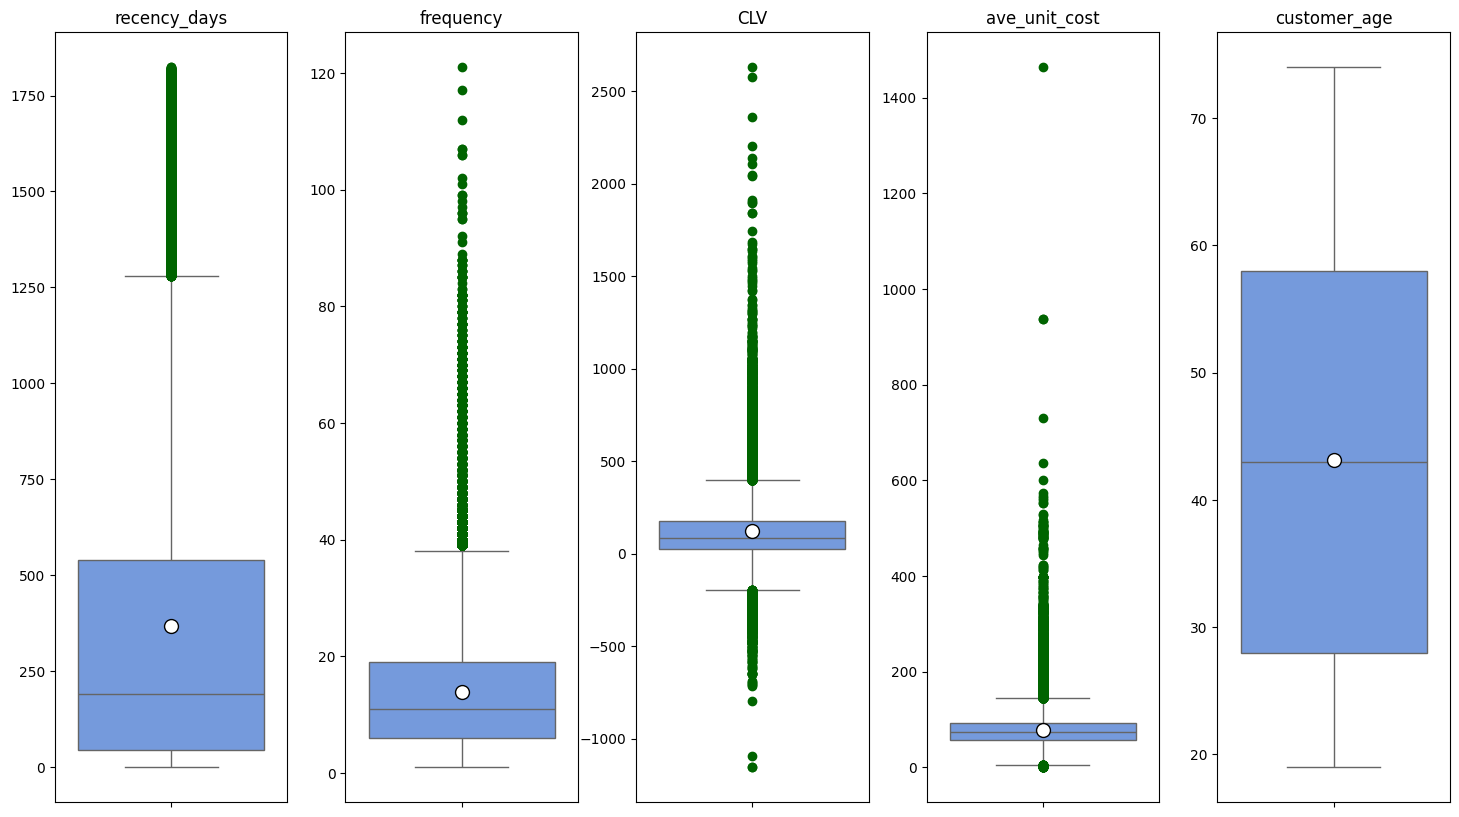

In [ ]:
def gen_boxplots(focused_data):
  cols = list(focused_data.columns) #convert the column names to a list
  num_cols = len(cols)

  # Create a figure with 1 row, and num_cols long
  fig, axs = plt.subplots(1, num_cols, figsize=(18,10))

  # Use a for loop to loop over each column in the dataframe and
  # create a separate box plot
  for i, (ax, curve) in enumerate(zip(axs.flat, cols)):
      sns.boxplot(y=focused_data[curve], ax=ax, color='cornflowerblue', showmeans=True,
              meanprops={"marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"10"},
            flierprops={'marker':'o',
                        'markerfacecolor':'darkgreen',
                        'markeredgecolor':'darkgreen'})

      ax.set_title(cols[i])
      ax.set_ylabel('')

  plt.subplots_adjust(hspace=0.15, wspace=0.25)
  plt.show()

gen_boxplots(focused_data)

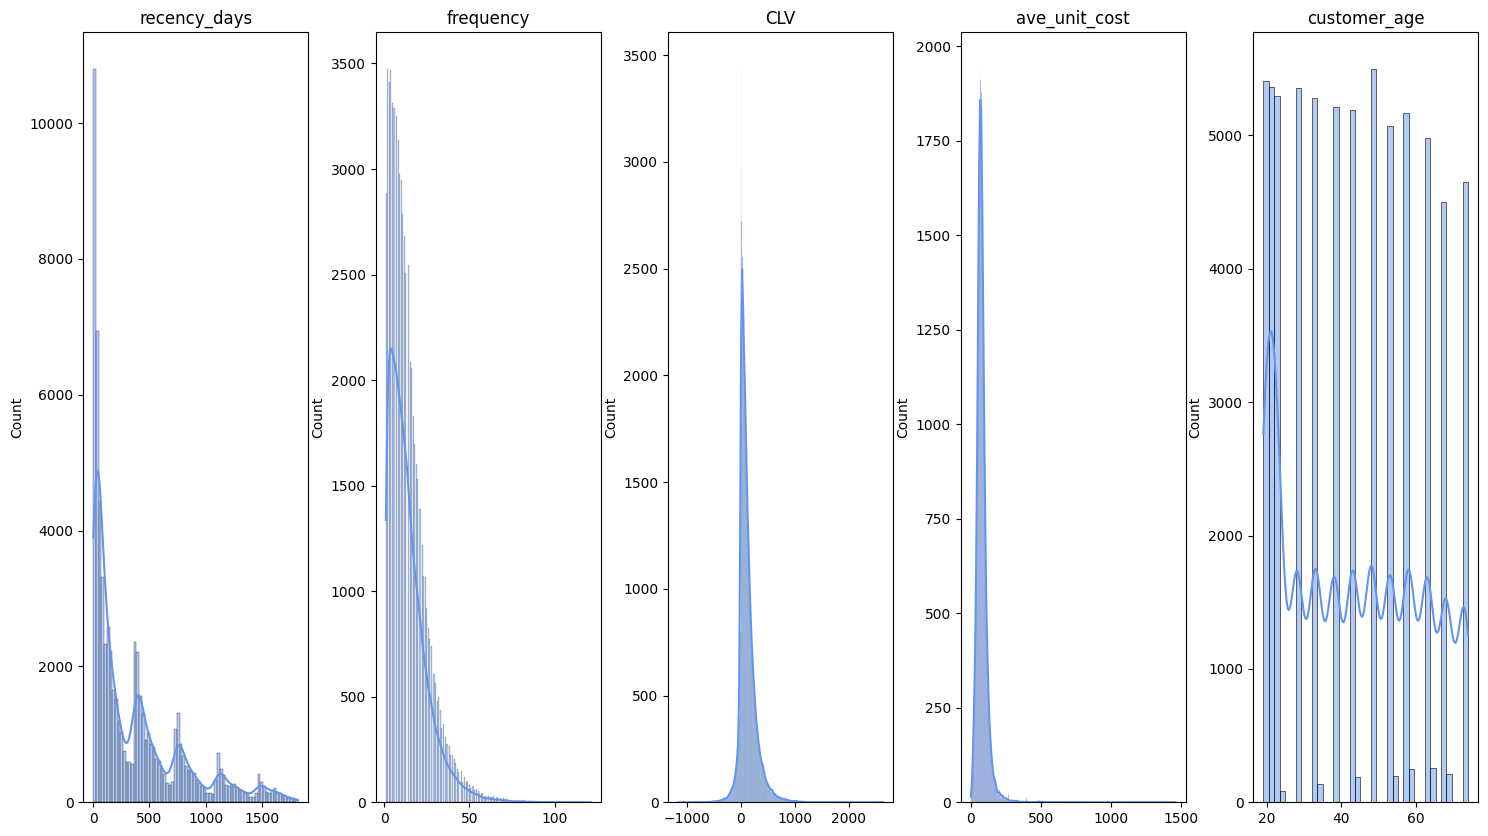

In [ ]:
def gen_histograms(focused_data):
  cols = list(focused_data.columns)
  num_cols = len(cols)

  # Create the figure and adjust layout based on number of columns
  if num_cols == 1:
      fig, ax = plt.subplots(figsize=(18, 10))
  else:
      fig, axs = plt.subplots(1, num_cols, figsize=(18, 10))

  # Iterate over columns and plot histograms
  for i, curve in enumerate(cols):
      data = focused_data[curve]

      if num_cols == 1:
          # Single column case
          sns.histplot(x=data, ax=ax, color='cornflowerblue', kde=True)
          ax.set_title(curve)
          ax.set_xlabel('')
      else:
          # Multiple columns case
          sns.histplot(x=data, ax=axs[i], color='cornflowerblue', kde=True)
          axs[i].set_title(curve)
          axs[i].set_xlabel('')

  # Adjust spacing between subplots (if applicable for multiple columns)
  if num_cols > 1:
      plt.subplots_adjust(hspace=0.15, wspace=0.3)

  plt.show()

gen_histograms(focused_data)

It does seem strange that there are so few ages observed among the dataset.

Let's double check that we haven't introduced an error by viewing the original birth date column histogram.

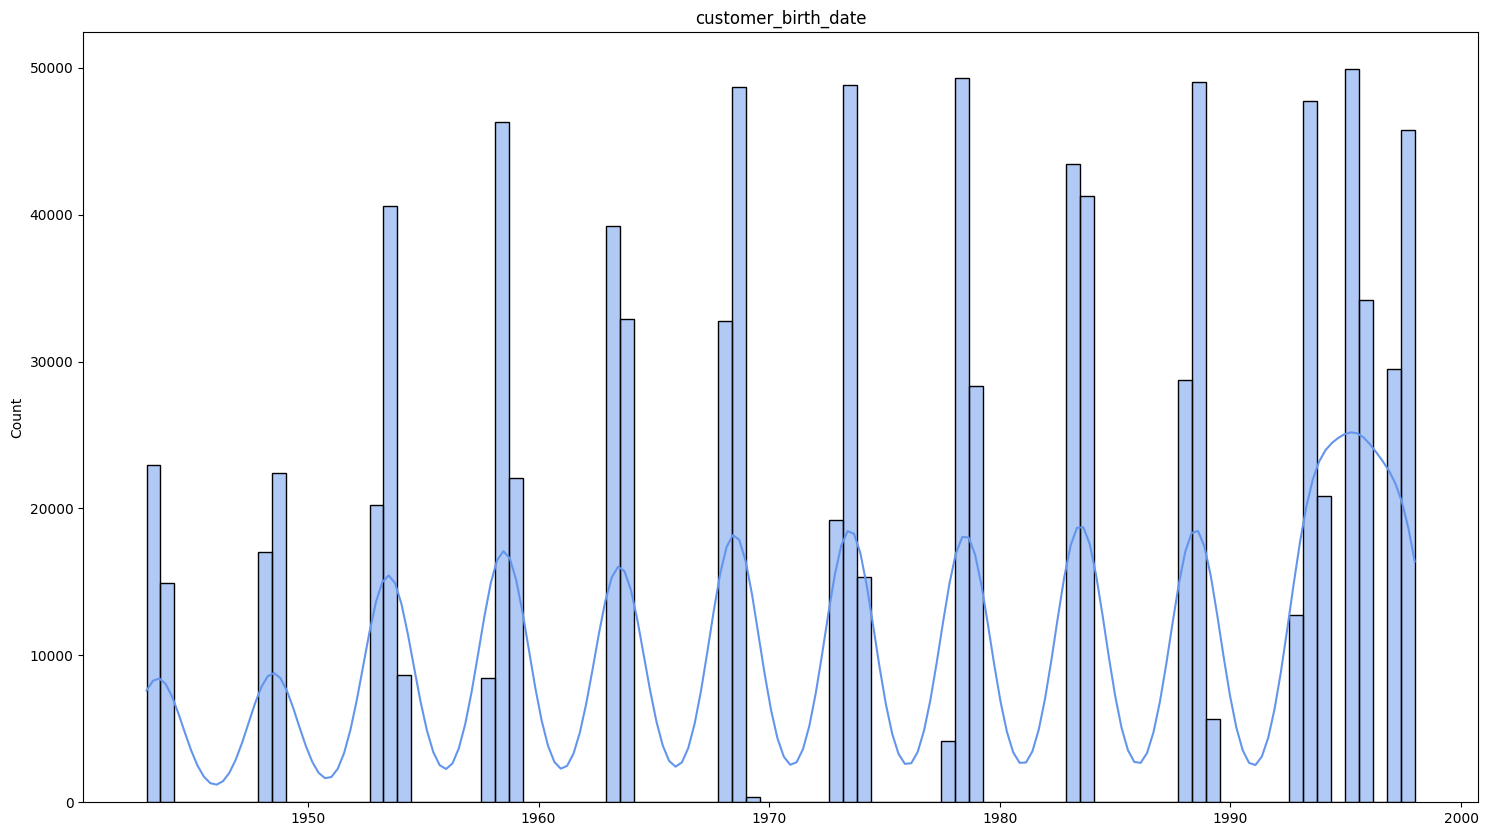

In [ ]:
gen_histograms(pd.DataFrame(data['customer_birth_date']))

It seems as though the customer agea are indeed as disperse as they appear, which means the data is uncorrupted.<br>With regards to other observations from the visualisations, Recency and Age are not normally distributed. We see that Recency shows seasonal spikes in the data each year or so - presumably around the christmas holidays. Recency is weighted/skewed towards more recent orders, which intuitively we feel is better for the business. Were the skew towards older data we might consider removing outliers to discount customers who may not still be active. So these two columns' outliers are less concerning than those of other 3 columns, as they appear to be skewing the  CLV, unit cost and frequency data significantly which may lead to misleading results. <br><br>
Let's apply the IQR method on these 3 columns and see how the data appears afterwards.

In [ ]:
skewed_cols = ['ave_unit_cost','CLV','frequency']
for col in skewed_cols:
  sorted = focused_data[col].sort_values()
  q1 = sorted.quantile(0.25)
  q3 = sorted.quantile(0.75)
  iqr = q3 - q1
  threshold = 1.5 * iqr
  lower_bound = q1 - threshold
  upper_bound = q3 + threshold
  new_col_name = col + '_unskewed'
  focused_data[new_col_name] = focused_data[col].apply(lambda x: 1 if x > lower_bound and x < upper_bound else 0)

focused_data.head()


<ipython-input-53-48c29c602ddc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focused_data[new_col_name] = focused_data[col].apply(lambda x: 1 if x > lower_bound and x < upper_bound else 0)
<ipython-input-53-48c29c602ddc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focused_data[new_col_name] = focused_data[col].apply(lambda x: 1 if x > lower_bound and x < upper_bound else 0)
<ipython-input-53-48c29c602ddc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,recency_days,frequency,CLV,ave_unit_cost,customer_age,ave_unit_cost_unskewed,CLV_unskewed,frequency_unskewed
customer_id,,,,,,,,
1,17,35,123.30,89.622857,63,1,1,1
3,124,20,128.50,90.505000,33,1,1,1
4,1108,9,110.69,37.195556,33,1,1,1
5,5,19,227.48,107.947368,28,1,1,1
6,192,15,174.58,52.526667,58,1,1,1


In [ ]:
print(focused_data['ave_unit_cost_unskewed'].value_counts())
print(focused_data['CLV_unskewed'].value_counts())
print(focused_data['frequency_unskewed'].value_counts())

ave_unit_cost_unskewed
1    65411
0     2889
Name: count, dtype: int64
CLV_unskewed
1    63975
0     4325
Name: count, dtype: int64
frequency_unskewed
1    65646
0     2654
Name: count, dtype: int64


In [ ]:
final_data = focused_data[(focused_data['ave_unit_cost_unskewed']==1) & (focused_data['CLV_unskewed']==1) & (focused_data['frequency_unskewed']==1)]
print(final_data.shape)
final_data.head()

(59869, 8)


,recency_days,frequency,CLV,ave_unit_cost,customer_age,ave_unit_cost_unskewed,CLV_unskewed,frequency_unskewed
customer_id,,,,,,,,
1,17,35,123.30,89.622857,63,1,1,1
3,124,20,128.50,90.505000,33,1,1,1
4,1108,9,110.69,37.195556,33,1,1,1
5,5,19,227.48,107.947368,28,1,1,1
6,192,15,174.58,52.526667,58,1,1,1


In [ ]:
from typing_extensions import final
final_data.drop(['ave_unit_cost_unskewed', 'CLV_unskewed', 'frequency_unskewed'], axis = 1, inplace = True)

<ipython-input-56-155934dbef04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.drop(['ave_unit_cost_unskewed', 'CLV_unskewed', 'frequency_unskewed'], axis = 1, inplace = True)


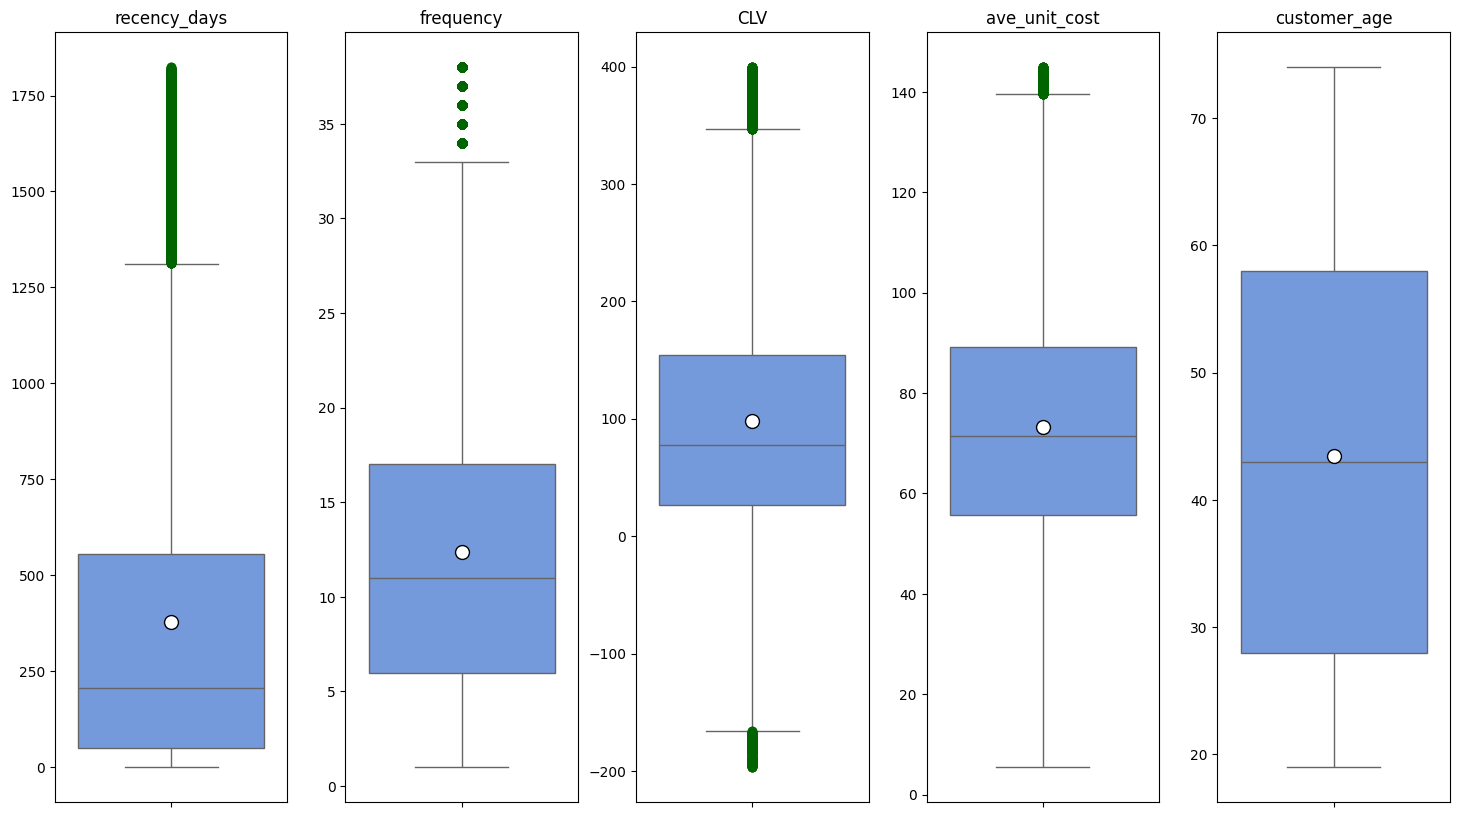

In [ ]:
gen_boxplots(final_data)

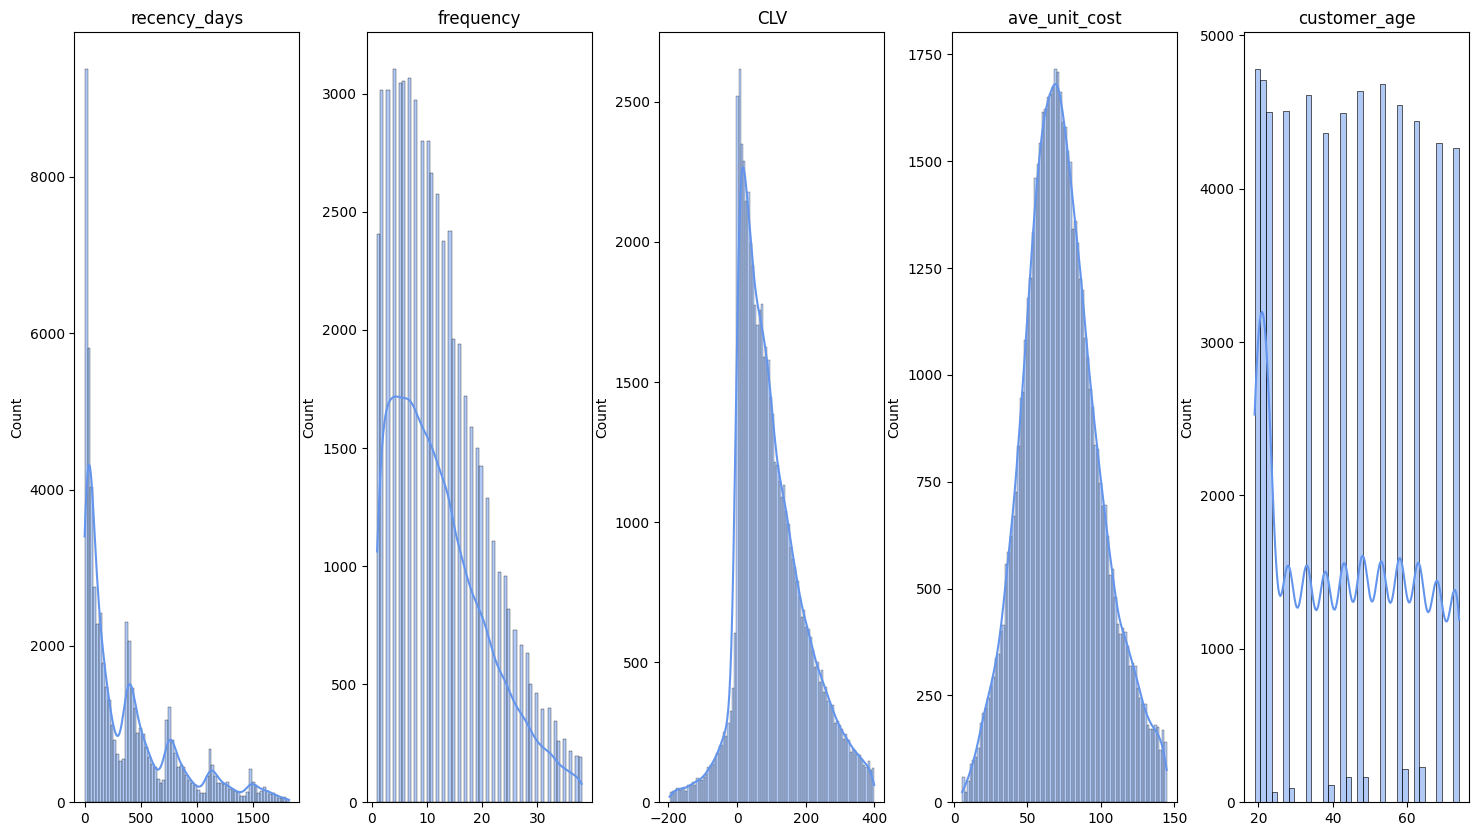

In [ ]:
gen_histograms(final_data)

We see that CLV and Average Unit Cost data are now far more evenly distributed, with a normal distribution that is far less influenced by outliers. Frequency is not normally distributed but is now far less influenced by outliers also.

# Clustering

<br>
Let's now perform clustering algorithms to try to identify customer segments such that the company can improve its marketing.
<br>
We first need to decide on the best number of clusters, (<i>K</i>). We will do this by adopting a number of techniques and evaluating their results. We will adopt first the elbow method, then the silhouette score and finally a visualisation of a dendogram via hierarchical clustering.<br>In order to do this we will first scale the data.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(final_data)

###i. The Elbow Method

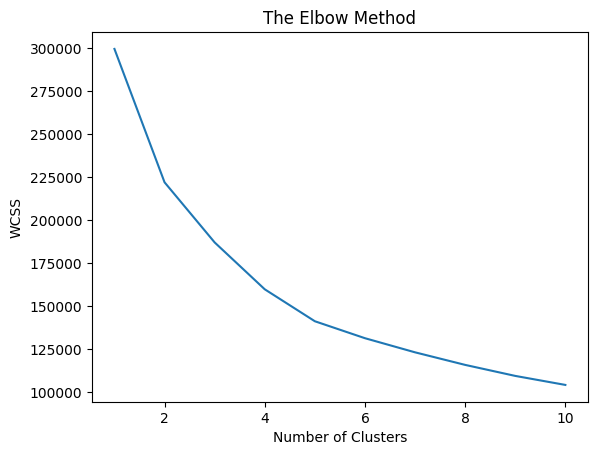

In [ ]:
from sklearn.cluster import KMeans

# Elbow method: try different k.
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

We see that the last signinficant inflection in the gradient of the curve occurs at around 5 clusters. Beyond this point, the within-cluster sum of squares (or inertia) of the clusters reduces at a reduced rate with each additional cluster. This suggests that to balance cohesion of segments and the clear separation, 5 clusters would be best. <br>
We can now compare this with the other approaches to identify the best value of <i>K</i>. We will first try the Silhouette method, given the Elbow method also shows a flattenig of the curve after 2 clusters, we will runt he methods for all values of <i>K</i> from 2-6.

###ii. The Silhouette method

In [ ]:
# Import necessary library.
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.2280011743294275
For n_clusters = 3 The average silhouette_score is : 0.20661688035560705
For n_clusters = 4 The average silhouette_score is : 0.21660128727782757
For n_clusters = 5 The average silhouette_score is : 0.2186075155660373
For n_clusters = 6 The average silhouette_score is : 0.20144380932799402


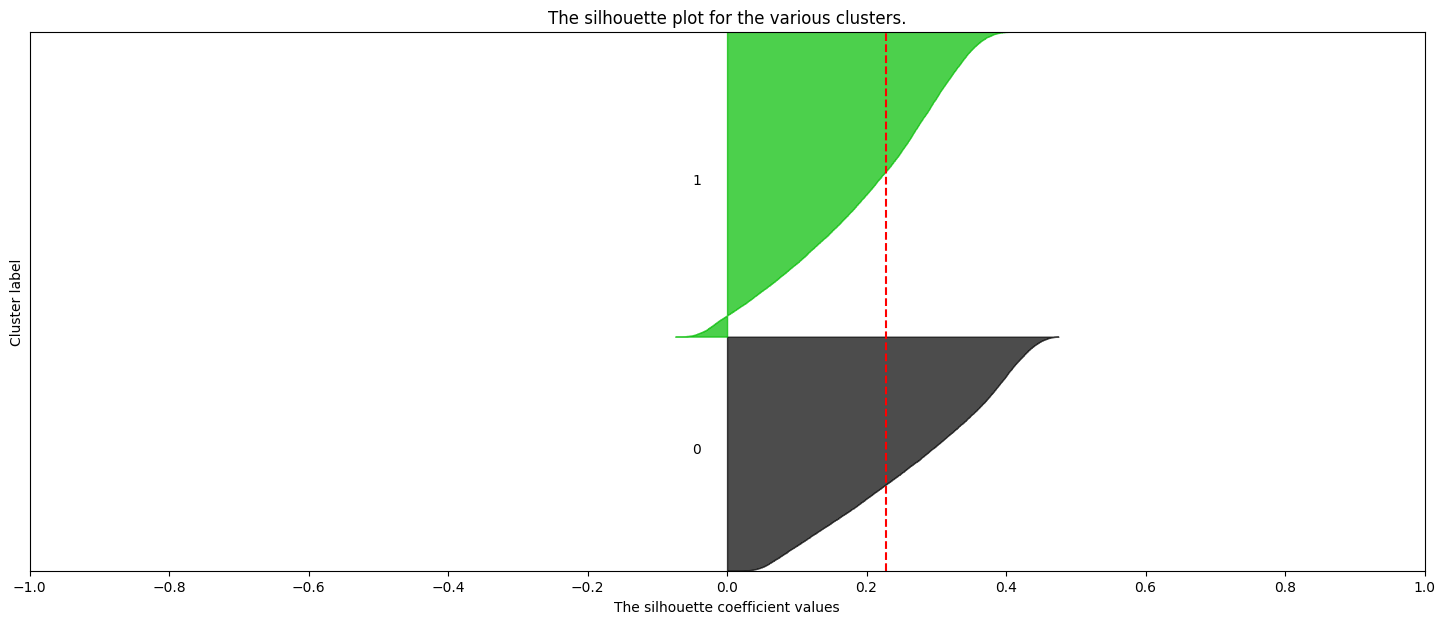

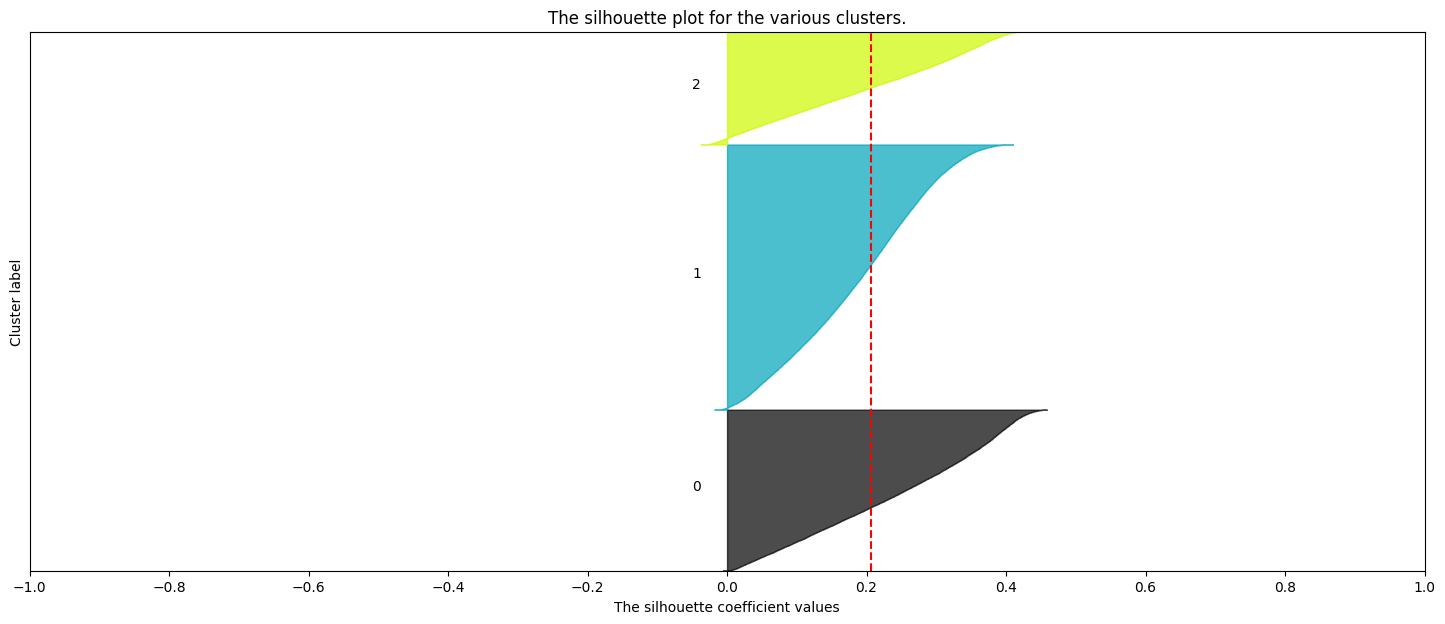

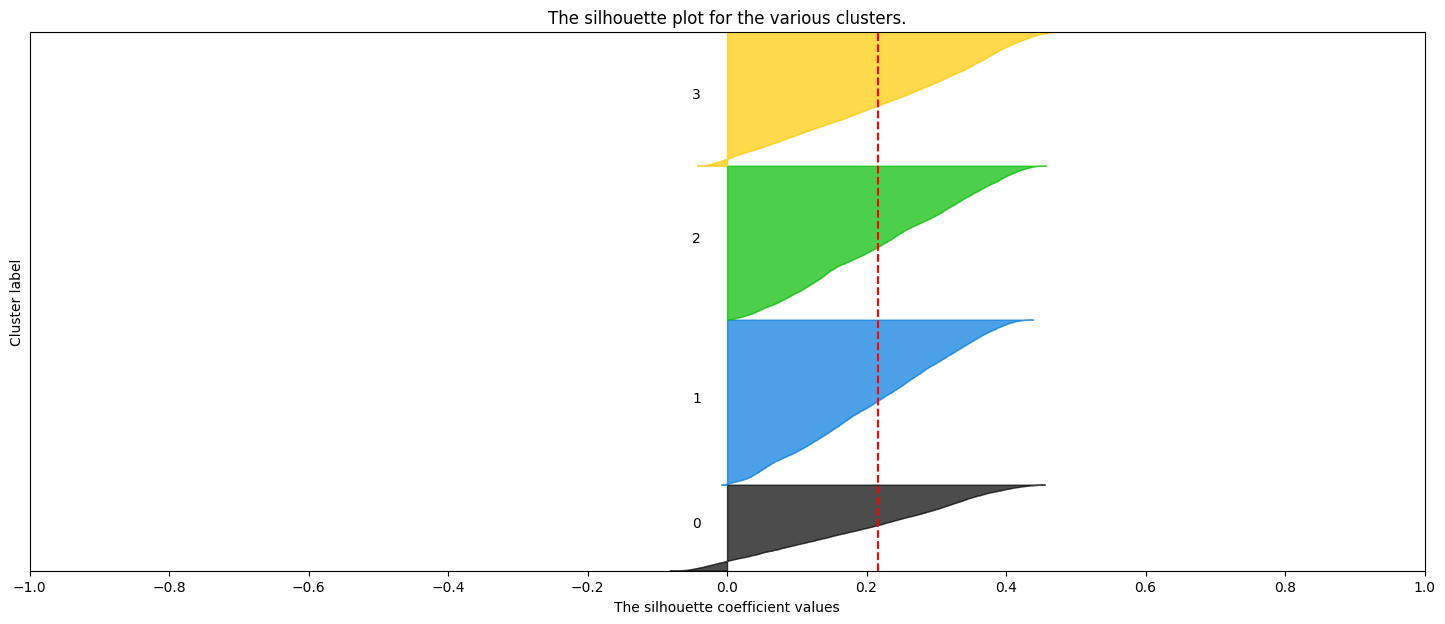

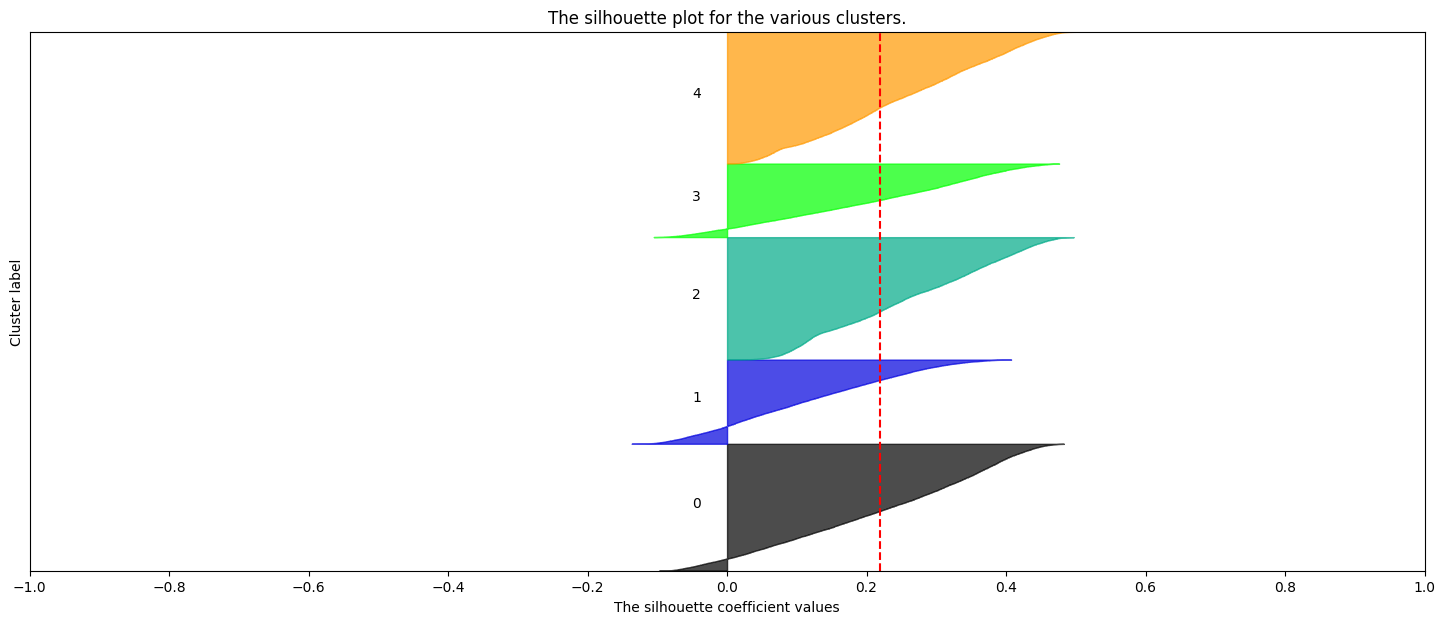

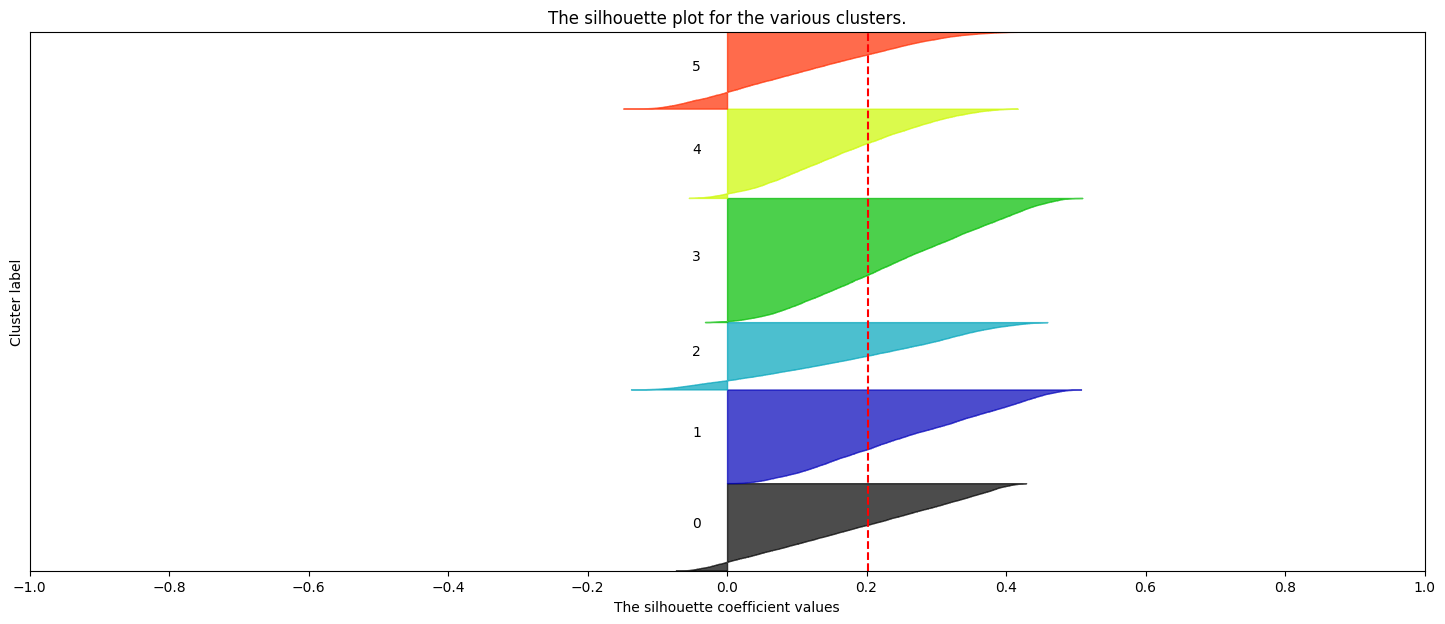

In [ ]:
for n_clusters in range(2,7):
    # Create a subplot with 1 row and 2 columns.
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-1, 1])
    # inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init = 10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them.
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle.
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot.
        y_lower = y_upper + 10  # 10 for the 0 samples.

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values.
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks.
    ax1.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

The silhouette scores are not particluarly high, suggesting that the data is difficult to segment into clear clusters. The shape of the clusters in the silhouette plots further suggest the data are not very tightly grouped within clusters and that some data lie further from the cluster-centroid than to datapoints in other clusters. That said, the score is highest K=2 cluster and then for K=5 clusters (0.2186), and the tails are smallest for K=2, which supports our conclusion from the Elbow method. <br>

###iii. Hierarchical Clustering

We will now use a dendogram to visualise a cluster hierarchy, adopting a method that uses the average distance between all data points in each cluster (average linkage). Based on the dendogram, we will be able to see whether K=5 still appears to be an optimal number of clusters.


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
X = pd.DataFrame(X)

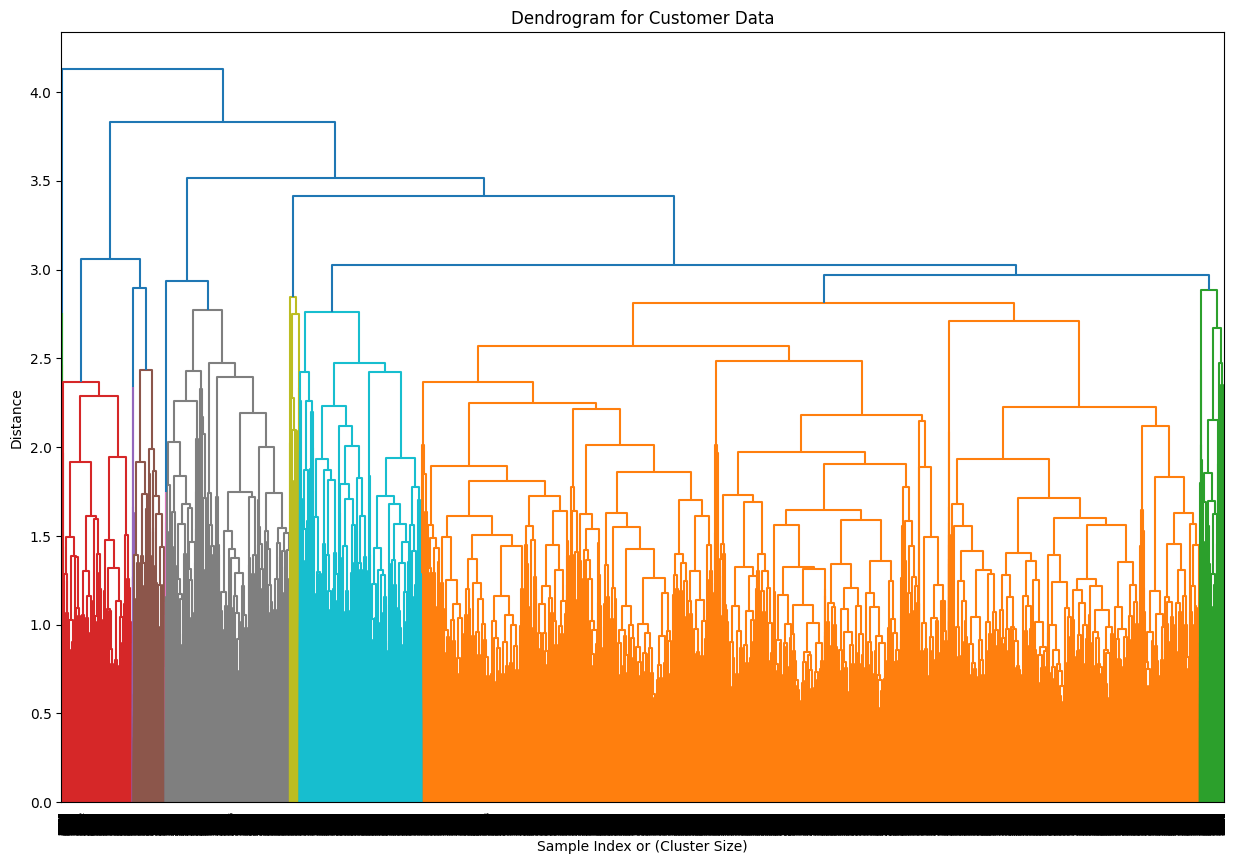

In [ ]:
# Perform Hierarchical Agglomerative Clustering
agglo_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='average')
X['cluster'] = agglo_cluster.fit_predict(X)

# Creating the linkage matrix and plotting the dendrogram
Z = linkage(X, method='average')
plt.figure(figsize=(15, 10))
dendrogram(Z, p=7)
plt.title('Dendrogram for Customer Data')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

The dendogram supports the selection of 5 clusters as a viable option, given the distance at 5 clusters (at distnce level of around 3.0) increases relatively significantly. Howver, there is one very short distance even at this level, meaning that the cluster count could be reduled to 4 without much loss in terms of accuracy. <br>
However, if we select K as 2, at distcnce level of around 3.5, there is clearly a significant cost to reducing further to 1 cluster. Given K=2 was also supported by the sihouette scores. We will settle on K=2 as our cluster count and assign the customers to one of 2 clusters using K-means clustering.

## K-means clustering with K=2

In [ ]:
# Set X column names
col_names = list(final_data.columns)
col_names.append('cluster')
for i in range(len(col_names)):
  X.rename({i: col_names[i]}, axis = 1, inplace = True)
X.columns = col_names

Index([0, 1, 2, 3, 4, 'cluster'], dtype='object')


In [ ]:
# Perform k-means clustering using scikit-learn.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42,  n_init=10)
X['cluster'] = kmeans.fit_predict(X)

# Extracting centroids.
centroids = kmeans.cluster_centers_

### View cluster assignment in table

In [ ]:
X.head()

,recency_days,frequency,CLV,ave_unit_cost,customer_age,cluster
0,-0.867591,2.693776,0.256429,0.633760,1.112060,0
1,-0.610201,0.909752,0.308843,0.667837,-0.592968,0
2,1.756825,-0.398533,0.129324,-1.391500,-0.592968,1
3,-0.896457,0.790817,1.306527,1.341634,-0.877139,0
4,-0.446626,0.315077,0.773313,-0.799261,0.827889,0


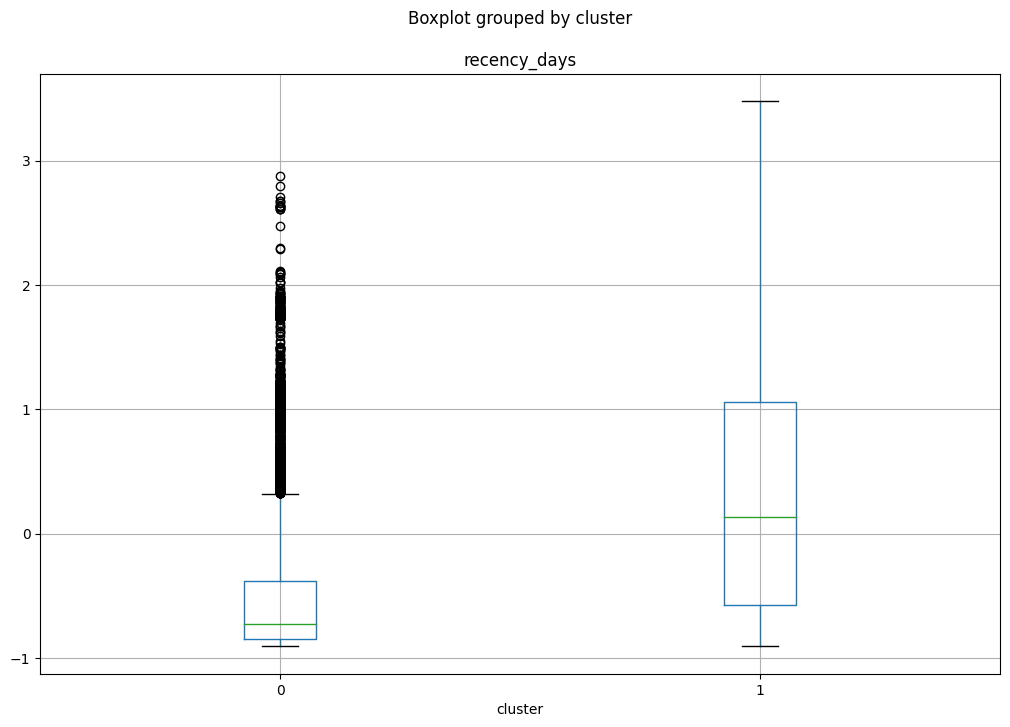

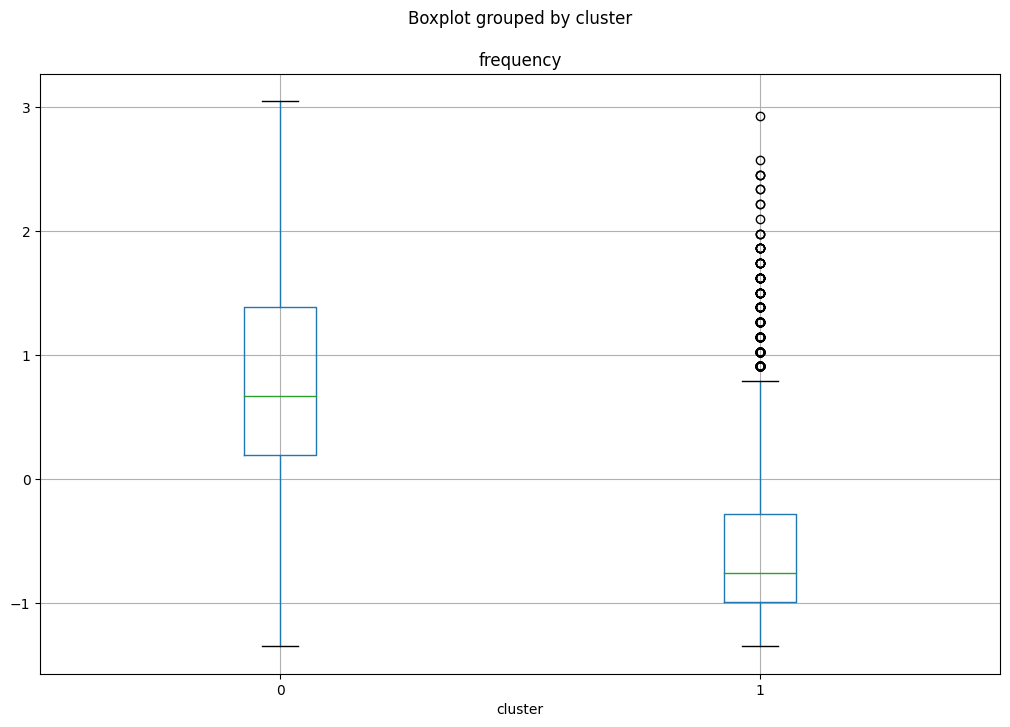

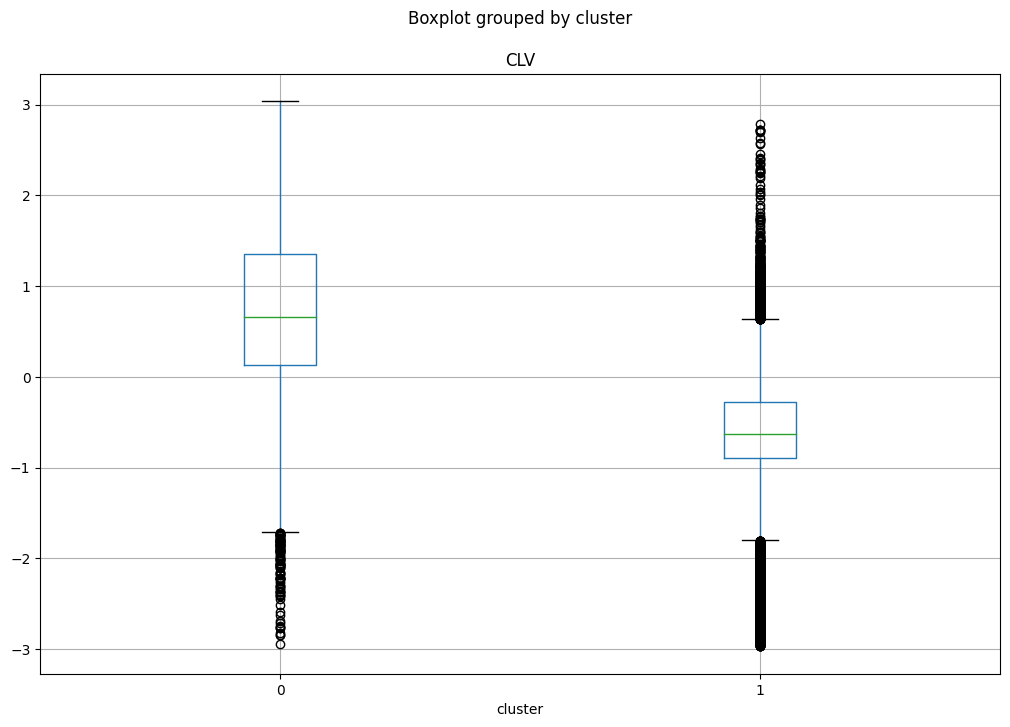

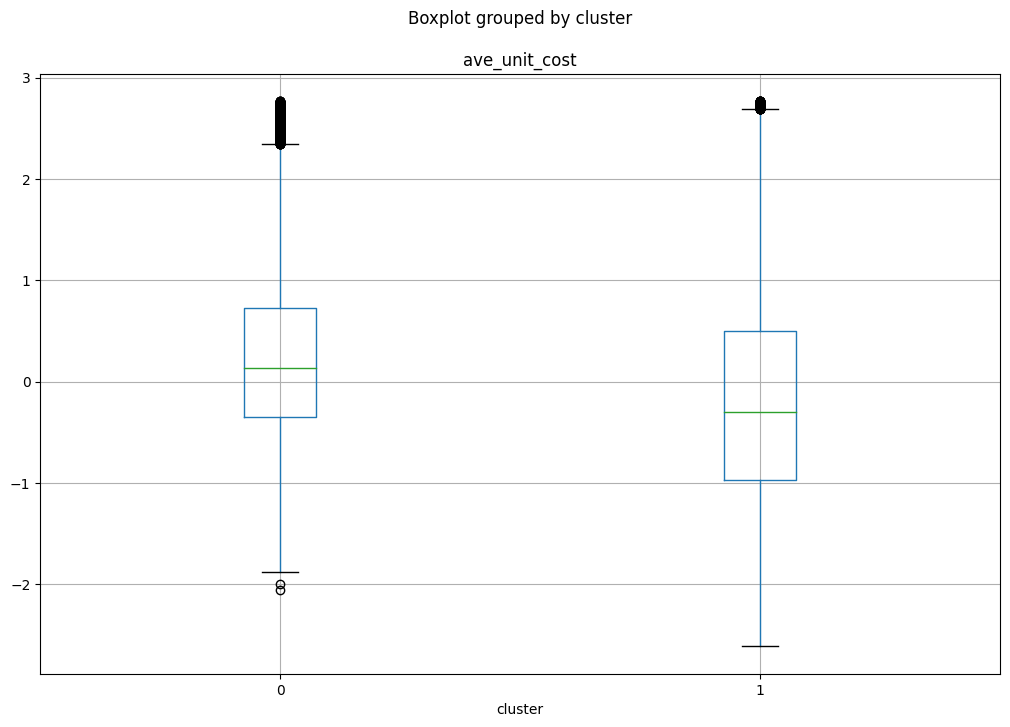

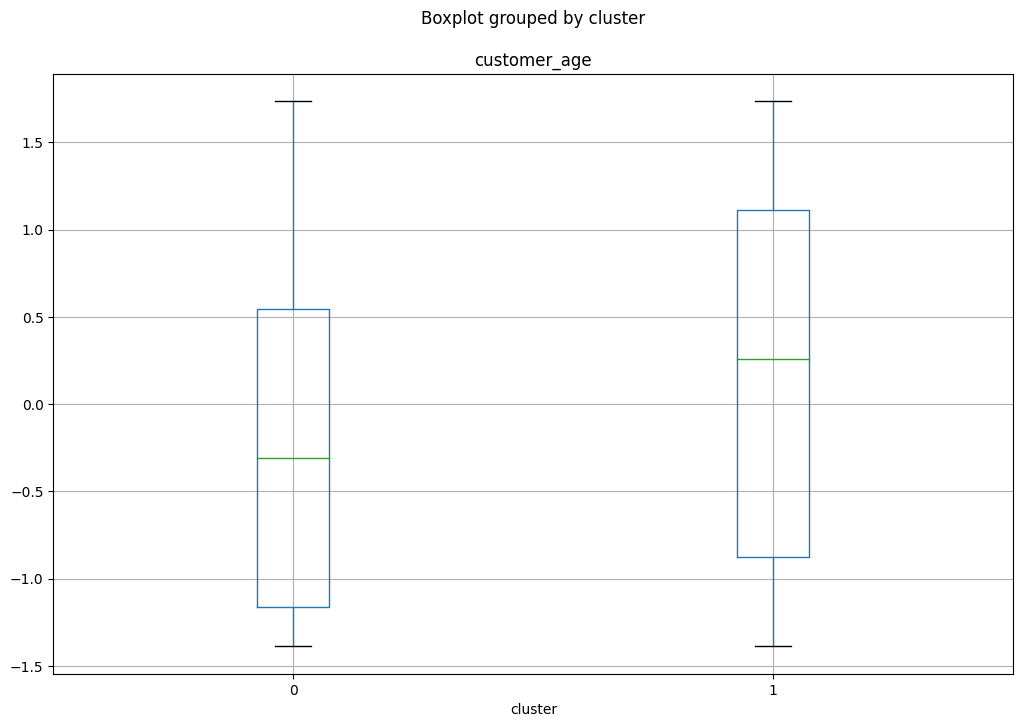

In [ ]:
# X.groupby(['cluster']).boxplot(subplots=True, figsize=(15, 10))
for col in X.columns:
  if col != 'cluster':
    X.boxplot(column=col, by='cluster', figsize=(12, 8))
    plt.show()

## Visualising Assigned Clusters (after dimernsionality reduction)

We will now reduce the 5 features we have analysed to 2-D in order to visualise the data in 2D format. We will do this using both Principal Componenet Analysis and t-SNE.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
PCA_model = PCA(n_components=2)
pca_data = X.drop('cluster', axis=1)
PCA_transformed_data = PCA_model.fit_transform(pca_data)

In [ ]:
pca_df = pd.DataFrame(PCA_transformed_data, columns=['Feature 1', 'Feature 2'])
pca_df['cluster'] = X['cluster']
pca_df.head()

,Feature 1,Feature 2,cluster
0,2.113578,-1.253837,0
1,1.288981,0.507013,0
2,-1.197233,0.202833,1
3,2.110944,0.825155,0
4,0.487003,-1.321020,0


<Axes: xlabel='Feature 1', ylabel='Feature 2'>

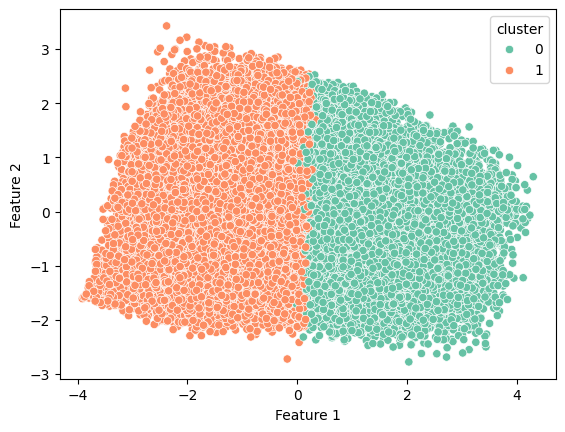

In [ ]:
sns.scatterplot(x=pca_df['Feature 1'], y=pca_df['Feature 2'], hue=pca_df['cluster'], palette='Set2')

In [ ]:
# Transform the data with t-SNE.
TSNE_model = TSNE(n_components=2, perplexity=30.0)
tse_data = X.drop('cluster', axis=1)
TSNE_transformed_data = TSNE_model.fit_transform(tse_data)

In [ ]:
tsne_df = pd.DataFrame(TSNE_transformed_data, columns=['Feature 1', 'Feature 2'])
tsne_df['cluster'] = X['cluster']
tsne_df.head()

,Feature 1,Feature 2,cluster
0,91.073051,-62.969357,0
1,64.535599,29.688890,0
2,-98.367317,26.688044,1
3,73.824760,26.816021,0
4,29.955996,-87.457726,0


<Axes: xlabel='Feature 1', ylabel='Feature 2'>

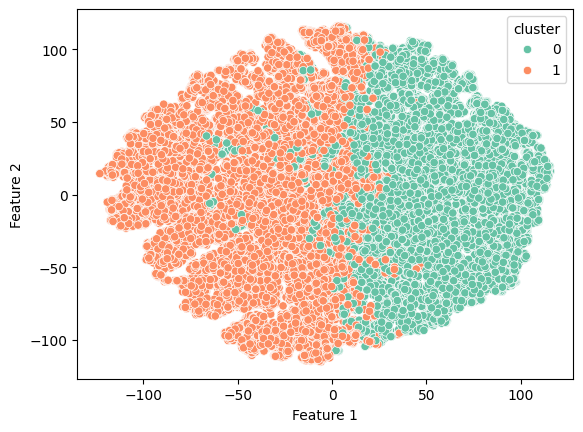

In [ ]:
sns.scatterplot(x=tsne_df['Feature 1'], y=tsne_df['Feature 2'], hue=tsne_df['cluster'], palette='Set2')

We see that the t-SNE diagram suggests less clear distinction between the clusters than the image based on the PCA data. t-SNE is known to be less susceptible to outlier influence, so it may be that our clustering is still being influenced by outliers. On the whole, however we can clerly see a distinction between the two clusters, especially when using PCA dimensionlity reduction.
<br>
<br>
We will now summarise our work, our findings and the information gleaned about customers in both odentified clusters, in a report.